<a href="https://colab.research.google.com/github/J1116/physics/blob/main/summary_of_tensor_shift_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary of experiment for suppression of tensor effect

More detail is [here](https://arxiv.org/abs/2206.05465)

## Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd drive/My Drive/'Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# import spe2py as spe
# import spe_loader as sl
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
import pandas as pd

## Experimental method

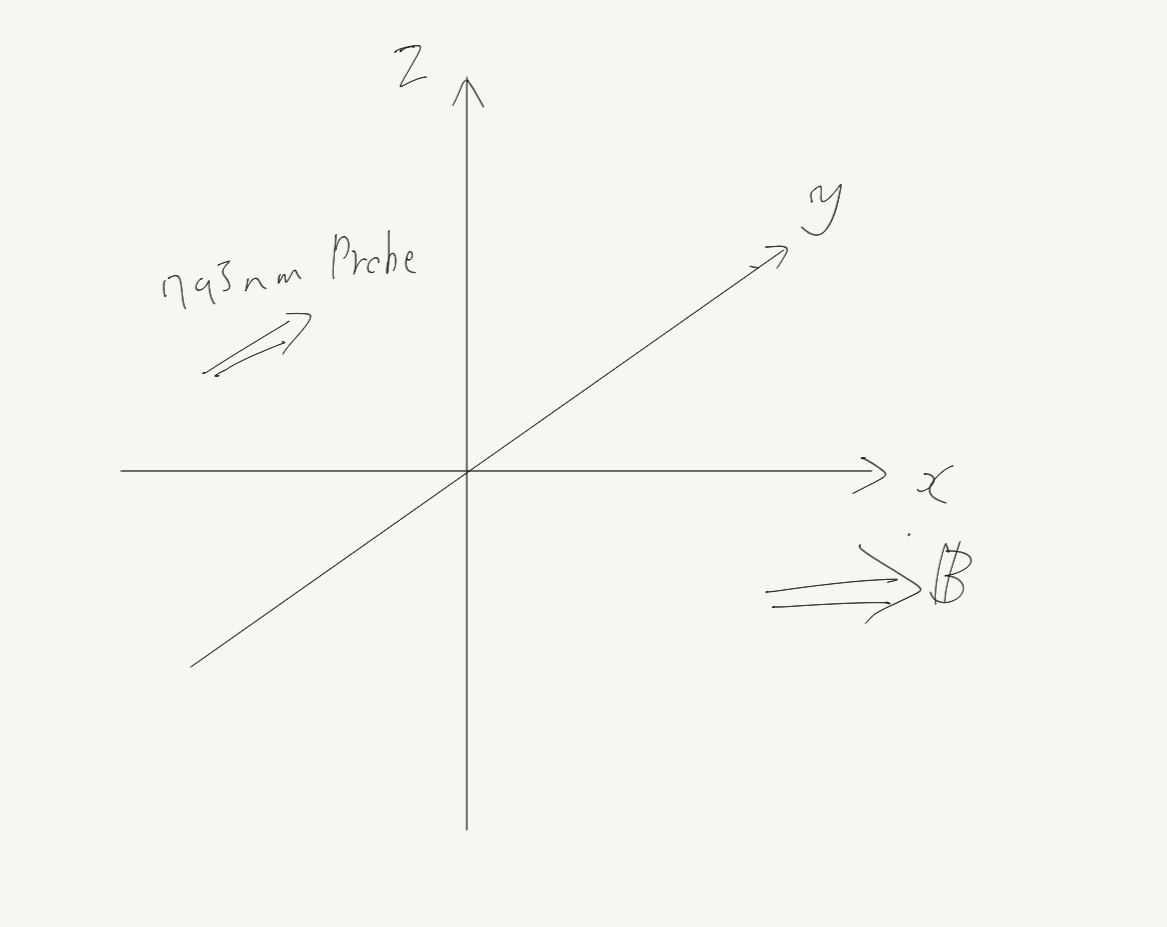

1.  create BEC
2.  polaraize spin (magnetic field direction)
3.  $\pi$/2 RF pulse to tilt the spins in the plane perpendicular to the magnetic field
4.  $\pi$ pulse after $t1$ second
5.  incident the $795$nm probe light after $t2$ second
6.  repeat [4] any number of times with the same spin direction timing (every cycle)
7.  $\pi$ / 2RF pulse after $2 \times t1$ second, and measure the population of eigen states for $F_z$ by using Stern-Gerlach and absorbtion imaging


π/2 RF pulse to tilt the spins in the plane perpendicular to the magnetic field

## experimental parameter

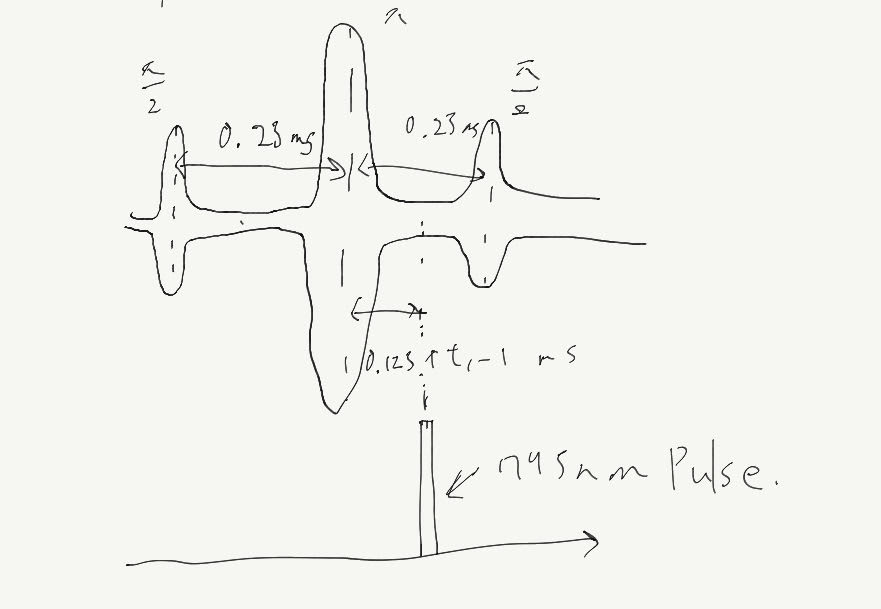

### RF parameter
$$
A = 0.2V, f = 105.5kHz, w = 14.39\mu s, t_1 = 0.99975 ms, dt = 0.25ns, \phi _1 = \phi _2 = 0
$$

795nm Pulse width：Burst cycle = 200($\approx$ 667ns) at $300$ MHz

When conmpensation light is incident simultaneously, set the number of pulses to 9

## spin angle against light

Change the timing of applying the 795nmprobe and analyze the spin angle by looking at the PCI. As for the direction, it is desirable to face the probe direction.

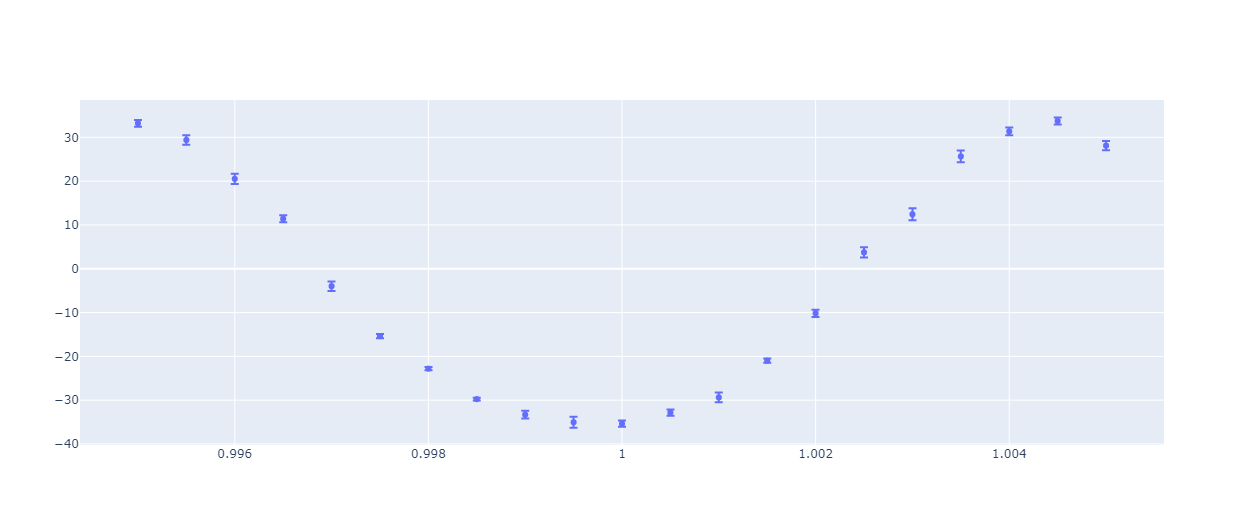

Pulse at a time that seems to be a stationary point.

## estimate the coefficient of tensor shift

The frequency shown is the frequency of the reference used for beat lock
Basically ref * 4 - 300 is the detuning from F'=1
ref = -135MHz pulse is 9 pulses (because it hardly changes)
Other frequencies are 1 pulse.
Light intensity is monitored with a PC oscilloscope.
The coefficients of the tensor are estimated by analyzing the dynamics of the spins as the intensity is varied using absorption imaging. The ratio of the tensor coefficients to ref=-135MHz is then derived for each frequency.


The analysis is as follows

### condition

Magnetic field: $z$ axis direction

Polarization: $\theta$ tilted from $z$ axis (in $xz$ plane)

Spin initial state: $+2$ eigenstate of $F_x$

### flow

1. Apply a magnetic field to rotate the spin $\phi$
2. Apply light of any frequency to change the state
3. Apply magnetic field again -$\phi$ to rotate (undo)
4. Apply a magnetic field to the $y$ axis and rotate $\pi$
5. Look at the magnetization along the $z$ axis

### method

Coordinates (spin) are rotated to align the polarization angle with the z-axis.
After that, rotate $\phi$ around the transformed z-axis.
This series of steps is performed using the winner D matrix
After that, the nonlinear Hamiltonian is applied and the inverse matrix of the previous rotation matrix is applied
Finally, multiply by the rotation matrix around the y-axis to calculate the magnetization of Fz.

initial state is $|\psi \rangle _{init} = (1/4,1/2,\sqrt{6}/4,1/2,1/4)$

WignerDmatrix:
$$D_{m'm}^j (\alpha,\beta,\gamma) = \langle jm' | R(\alpha,\beta,\gamma) | jm\rangle$$
$$= e^{-im'\alpha}d_{m'm}^j(\beta) e^{-im\gamma}$$
where
$$d_{m'm}^j(\beta) = \langle jm' | e^{-i\beta jy}| jm\rangle$$
$$= D_{m'm}^j (0,\beta,0)$$
$$R(\alpha,\beta,\gamma) = e^{-i\alpha j_z} e^{-i\beta j_y} e^{-i\gamma j_z}$$


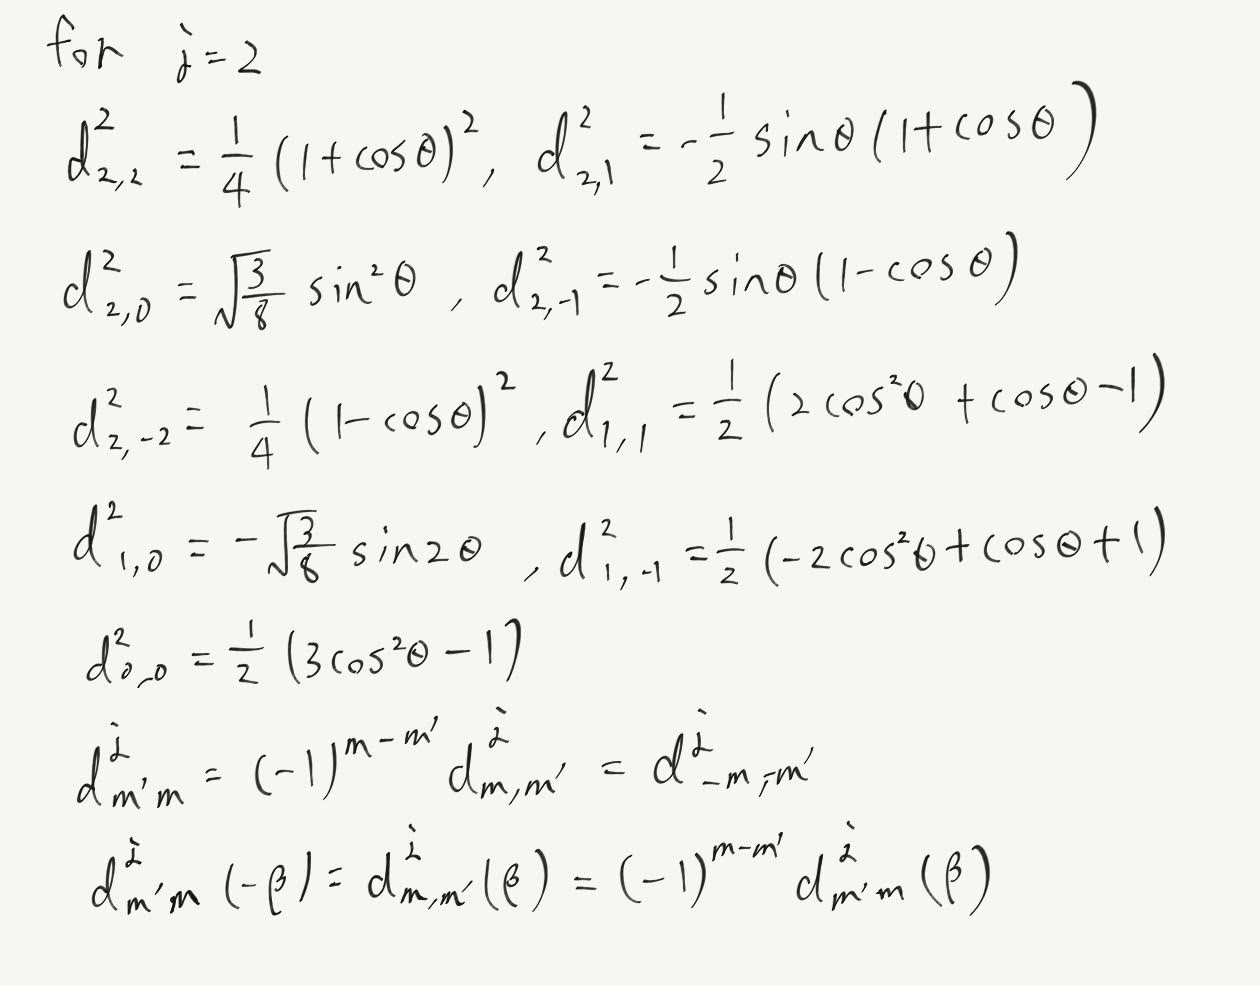

final state is
$$
| \psi \rangle _{end} = T_2 \cdot T \cdot U^{\dagger} \cdot A \cdot U \cdot | \psi \rangle _{init}
$$
where
$$
U = D^2 (0,-\theta,\phi)
$$
$$
A = diag(e^{-4iap},e^{-iap},1,e^{-iap},e^{-4iap})
$$
$$
T = D^2 (0,-\pi / 2,0)
$$
$$
T_2 = D^2 (\pi,0,0)
$$
and $a$ is parameter depending on the frequency of light、$p$ is parameter depending on the intensity of light.

For this final state, calculate expectation value of $F_z$
$$
\langle F_z \rangle = {_{end}\langle}\psi | F_z | \psi \rangle _{end}
$$
$\theta$ set to $54^{\circ}$(magic angle)

$\langle F_z \rangle$ at $\phi = \pi / 4$

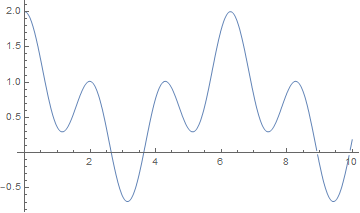

$\phi = \pi / 2$

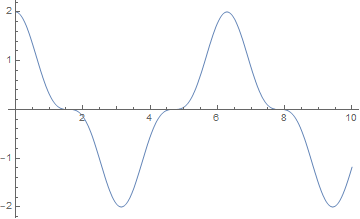

In this experiment, I use $\phi = \pi /2$

The $\langle F_z \rangle$ obtained here is fitted to the measured $\langle F_z \rangle _{exp}$ data by varying the light intensity to obtain the frequency-dependent coefficient $a$.

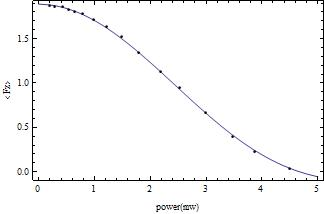

Frequency dependence of coefficient $a$ (values are appropriate), horizontal axis is detuning from F=2->F'=1

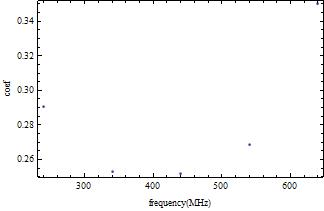

fitting result by $d(1/x - 1/(x-800)) + e$

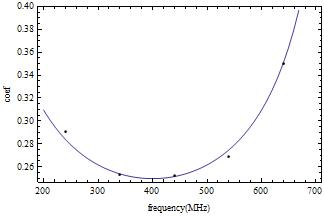

conparing probe frequency (a_compensation / a_probe)

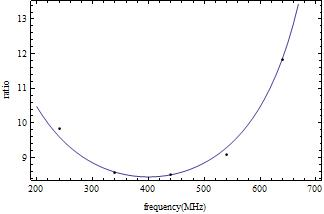

## compensate tensor effect of probe light

See how $\langle F_z \rangle$ moves when you mix probe and compensation in the ratio above.



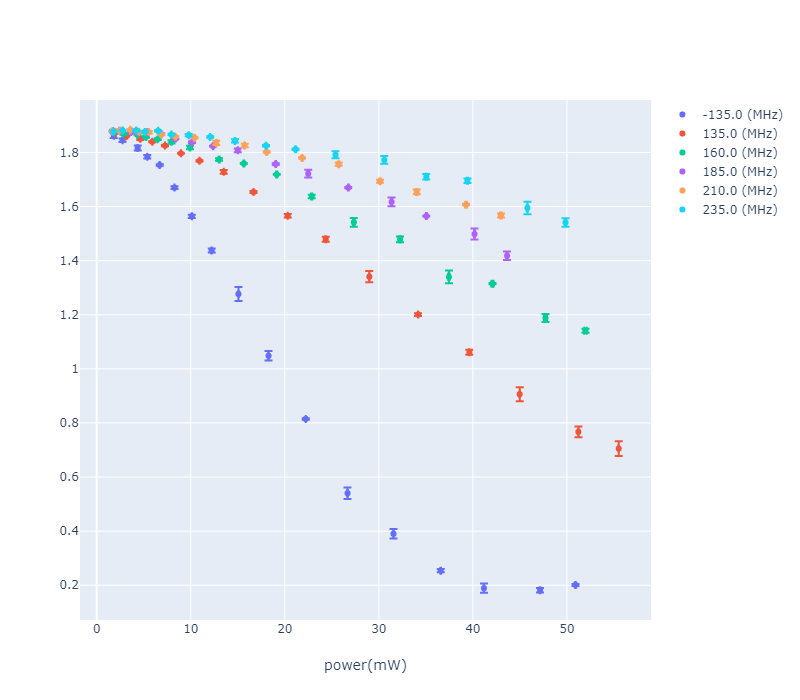

### code

In [ ]:
df = pd.read_csv('csv/2021/210507_Log2.csv')

df

In [ ]:
for i in range(5):
  df_temp = pd.read_csv(f'csv/2021/210507_Log{i+3}.csv')
  df = pd.concat([df, df_temp])

In [ ]:
freq = df['freq'].values
freq_uni = np.unique(df['freq'].values)
freqnum = len(freq_uni)
Fz_mean = df['Fz_mean'].values
Fz_std = df['Fz_std'].values
amp_mean = df['amp_mean'].values
amp_std = df['amp_std'].values
fig = go.Figure()
fig.update_layout(width=800, height=700)

for i in range(freqnum):
  fig.add_trace(go.Scatter(x=amp_mean[freq == freq_uni[i]], y=Fz_mean[freq == freq_uni[i]],
                    mode='markers',
                    name=f'{freq_uni[i]} (MHz)',
                    error_y=dict(
                                type='data', # value of error bar given in data coordinates
                                array=Fz_std[freq == freq_uni[i]],
                                visible=True),
                    error_x=dict(
                                type='data', # value of error bar given in data coordinates
                                array=amp_std[freq == freq_uni[i]],
                                visible=True)))
fig.show()

## measurement of trap frequency

measure the frequency of trap. method is bellow.

### vertical derection

Untrap the optical trap, drop the BEC by gravity (1 ms), activate the optical trap again, and watch the frequency of the oscillation.


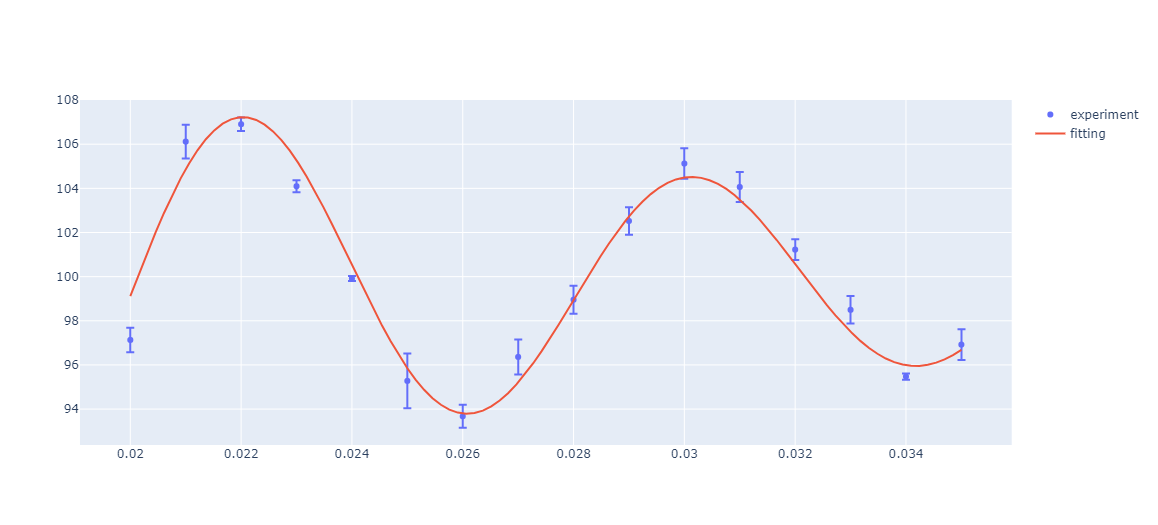

1.23470975e+02 (Hz)



Some attenuation (included in fitting)


### horizontal derection

The policy is the same as for longitudinal. Apply a magnetic field gradient instead of gravity. Then apply the optical trap again and watch the oscillation in the same way.


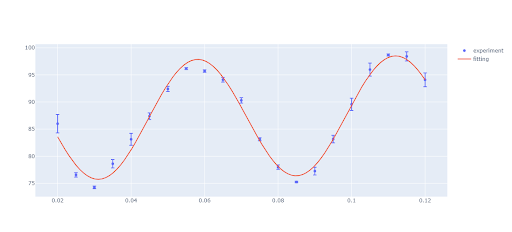

18.57148039(Hz)